<a href="https://colab.research.google.com/github/Akanksha546/notebook1/blob/main/image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

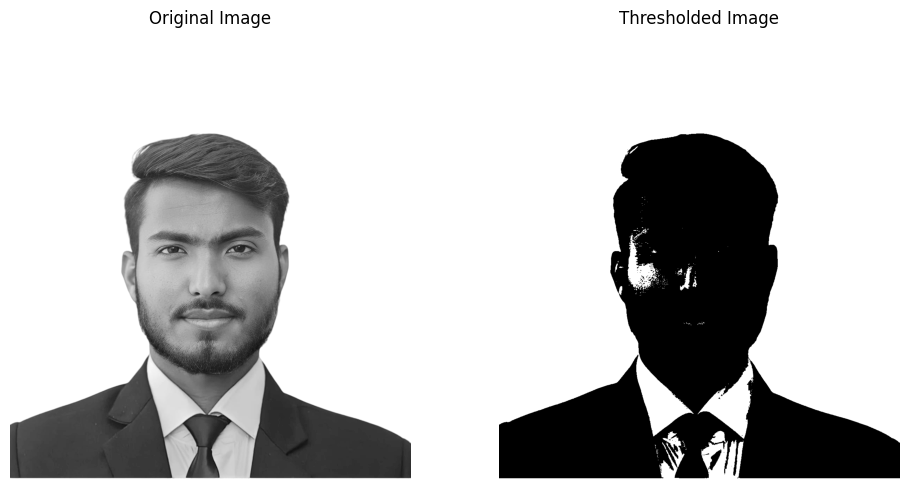

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#read the image
image =cv2.imread('/content/WhatsApp Image 2024-01-01 at 06.08.20.jpeg',cv2.IMREAD_GRAYSCALE)

#check if the image is loaded
if image is None:
  raise Exception("Could not read the image")

#Applying thresholding
threshold_value=200
_,thresholded_image=cv2.threshold(image,threshold_value,255,cv2.THRESH_BINARY)

#Displaying the original and thresholded images
plt.figure(figsize=(10,5))

#original image
plt.subplot(1,2,1)
plt.imshow(image,cmap='gray')
plt.title('Original Image')
plt.axis('off')

#Thresholded Image
plt.subplot(1,2,2)
plt.imshow(thresholded_image,cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')

plt.tight_layout()
plt.show()

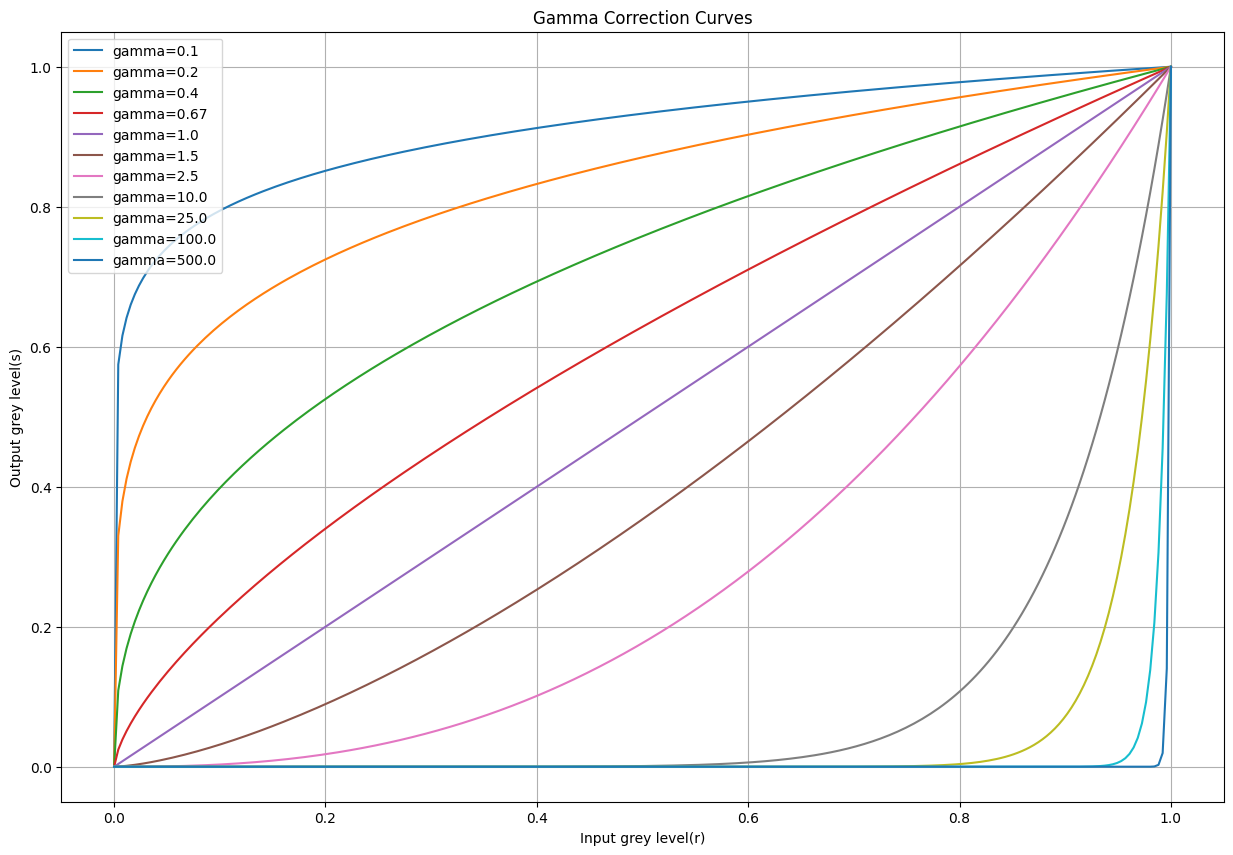

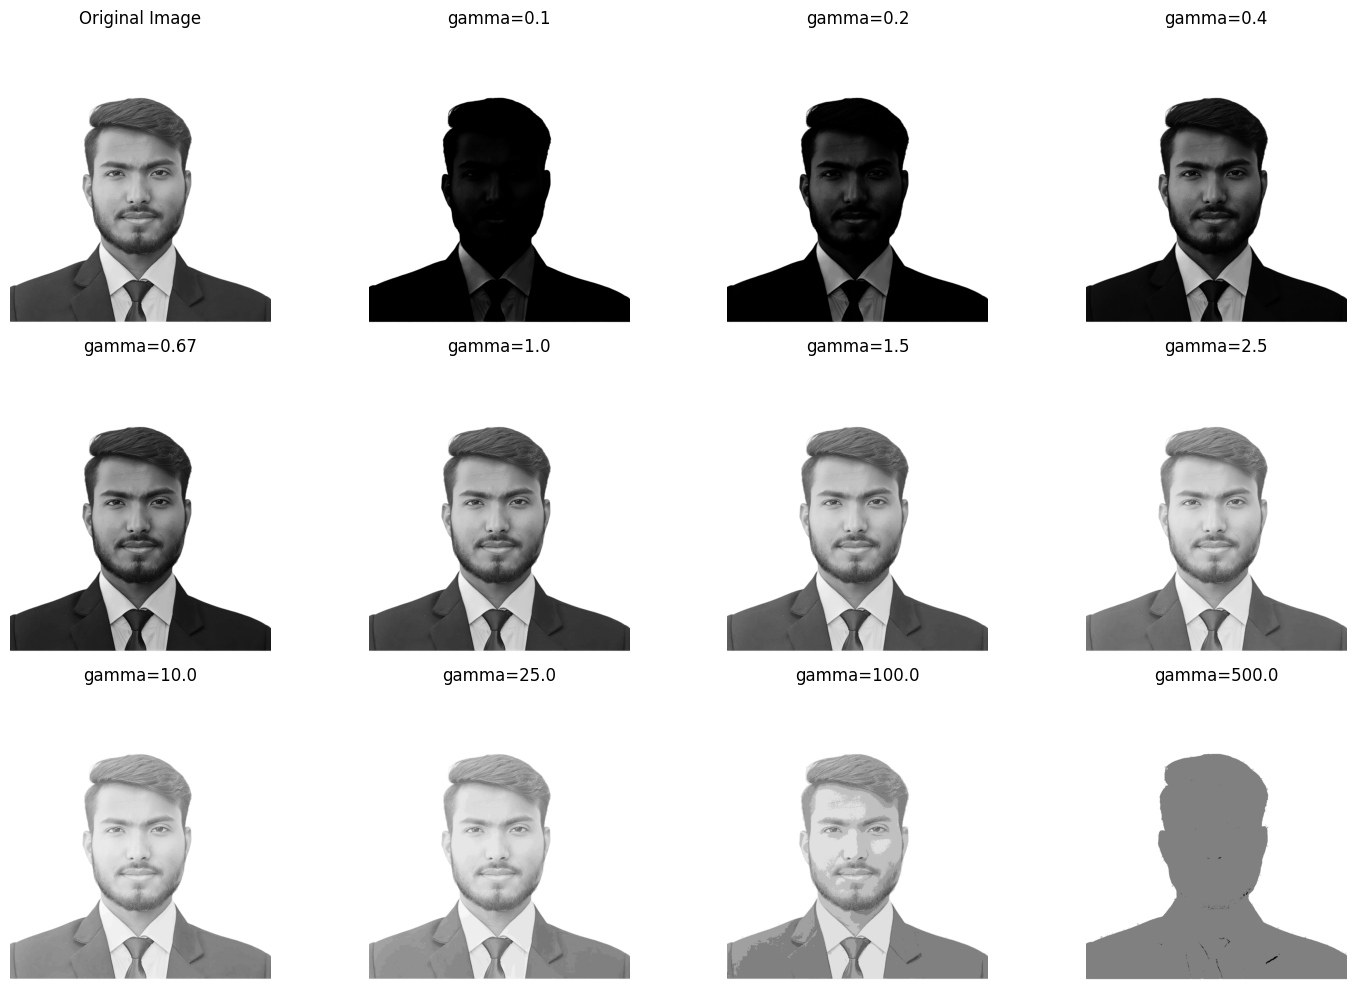

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def adjust_gamma(image,gamma=1.0):
  inv_gamma=1.0/gamma
  table=[((i/255.0)**inv_gamma)*255 for i in range(0,256)]
  table=np.array(table,dtype="uint8")
  #table=np.array([((i/255.0)**inv_gamma)*255 for i in range(0,256)],dtype="uint8")

  return cv2.LUT(image,table)

#read the image
image =cv2.imread('/content/WhatsApp Image 2024-01-01 at 06.08.20.jpeg',cv2.IMREAD_GRAYSCALE)

#Apply gamma correction with different gamma values
gamma_values=[0.1,0.2,0.4,0.67,1.0,1.5,2.5,10.0,25.0,100.0,500.0]
corrected_images=[adjust_gamma(image,gamma=gamma) for gamma in gamma_values]

#plot the teansformation curve
x=np.linspace(0,1,256)
plt.figure(figsize=(15,10))

for gamma in gamma_values:
  plt.plot(x,x**gamma,label=f'gamma={gamma}')


plt.title('Gamma Correction Curves')
plt.xlabel('Input grey level(r)')
plt.ylabel('Output grey level(s)')
plt.legend()
plt.grid(True)
plt.show()

#Display the original and gamma-corrected images
plt.figure(figsize=(15,10))
#original image

plt.subplot(3,4,1)
plt.imshow(image,cmap='gray')
plt.title('Original Image')
plt.axis('off')
#gamma corrected images
for i,(gamma,corrected_images) in enumerate(zip(gamma_values,corrected_images),start=2):
  plt.subplot(3,4,i)
  plt.imshow(corrected_images,cmap='gray')
  plt.title(f'gamma={gamma}')
  plt.axis('off')

plt.tight_layout()
plt.show()

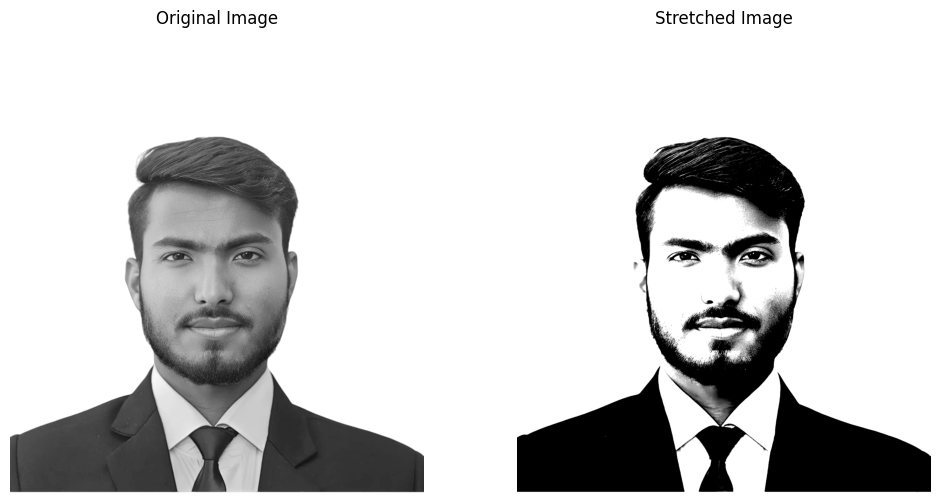

In [ ]:
#point processing :contrast Streaching
import cv2
import numpy as np
import matplotlib.pyplot as plt

def contrast_stretching(image,a,a1,a2,b,B1,B2):
  #Create lookup table for the transformation
  lut=np.zeros(256,dtype=np.uint8)
  for i in range(256):
    if i<=a:
      lut[i]=0
    elif a<=i<a1:
      lut[i]=np.clip((B1*(i-a))/(a1-a),0,255)
    elif a1<=i<a2:
      lut[i]=np.clip(B1+(B2-B1)*(i-a1)/(a2-a1),0,255)
    else:
      lut[i]=np.clip(B2+(255-B1)*(i-a2)/(b-a2),0,255)

  #Apply the lookup table to the image
  stretched_image=cv2.LUT(image,lut)
  return stretched_image

#load the image in grayscale
image =cv2.imread('/content/WhatsApp Image 2024-01-01 at 06.08.20.jpeg',cv2.IMREAD_GRAYSCALE)
# Define parameters for contrast stretching
a=50
a1=100
a2=150
b=200
B1=0
B2=255

#Apply contrast stretching
stretched_image=contrast_stretching(image,a,a1,a2,b,B1,B2)
#Display the original and Stretched images
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(image,cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(stretched_image,cmap='gray')
plt.title('Stretched Image')

plt.axis('off')
#plt.tight_layout()
plt.show()

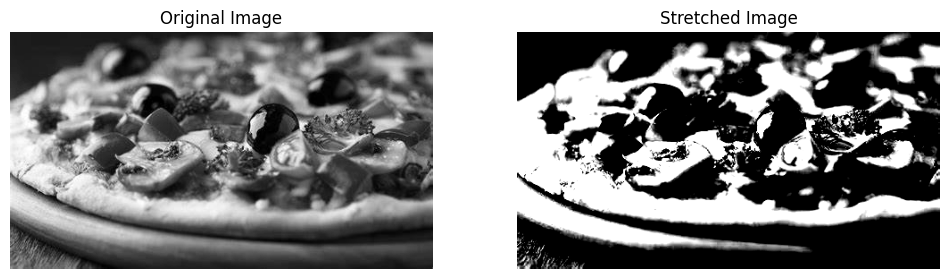

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def contrast_stretching(image, a, a1, a2, b, B1, B2):
    # Create lookup table for the transformation
    lut = np.zeros(256, dtype=np.uint8)
    for i in range(256):
        if i <= a:
            lut[i] = 0
        elif a < i <= a1:
            lut[i] = np.clip((B1 * (i - a)) / (a1 - a), 0, 255)
        elif a1 < i <= a2:
            lut[i] = np.clip(B1 + (B2 - B1) * (i - a1) / (a2 - a1), 0, 255)
        else:
            lut[i] = np.clip(B2 + (255 - B2) * (i - a2) / (b - a2), 0, 255)

    # Apply the lookup table to the image
    stretched_image = cv2.LUT(image, lut)
    return stretched_image

# Load the image in grayscale
image = cv2.imread('/content/OIP (4).jpg', cv2.IMREAD_GRAYSCALE)

# Define parameters for contrast stretching
a = 50
a1 = 100
a2 = 150
b = 200
B1 = 0
B2 = 255

# Apply contrast stretching
stretched_image = contrast_stretching(image, a, a1, a2, b, B1, B2)

# Display the original and stretched images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(stretched_image, cmap='gray')
plt.title('Stretched Image')
plt.axis('off')

plt.show()


In [ ]:
!pip install pillow

In [ ]:
#FT forerier transformtion
!pip install

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

#Load the image and convert to grayscale
image_path='/content/OIP (4).jpg' #Replace with your image path
image=image.open(image_path).convert('L')
image_np=np.array(image)

#Compute the 2d fourier Transform of the image
f_transform=np.fft.fft2(image_np)
f_transform_shifted=np.fft.fftshift(f_transform)

#compute the magnitude spectrum
magnitude_spectrum=20*np.log(np.abs(f_transform_shifted))

#plot the original image and its Fourier Transform magnitude spectrum
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(image_np,cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(magnitude_spectrum,cmap='gray')
plt.title('Fourier Transform Magnitude Spectrum')
plt.axis('off')

plt.show()

ERROR: You must give at least one requirement to install (see "pip help install")


AttributeError: 'numpy.ndarray' object has no attribute 'open'

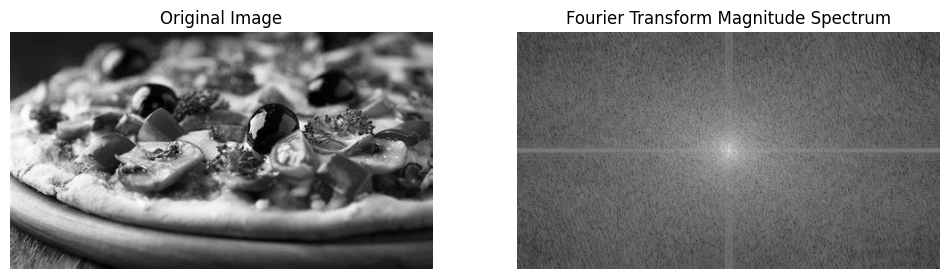

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the image and convert to grayscale
image_path = '/content/OIP (4).jpg'  # Replace with your image path
image = Image.open(image_path).convert('L')
image_np = np.array(image)

# Compute the 2D Fourier Transform of the image
f_transform = np.fft.fft2(image_np)
f_transform_shifted = np.fft.fftshift(f_transform)

# Compute the magnitude spectrum
magnitude_spectrum = 20 * np.log(np.abs(f_transform_shifted))

# Plot the original image and its Fourier Transform magnitude spectrum
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_np, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Fourier Transform Magnitude Spectrum')
plt.axis('off')

plt.show()


**filters**

<ipython-input-3-65832bc9c4ac>:47: RuntimeWarning: divide by zero encountered in log
  plt.imshow(20*np.log(np.abs(filtered_transform)),cmap='gray')


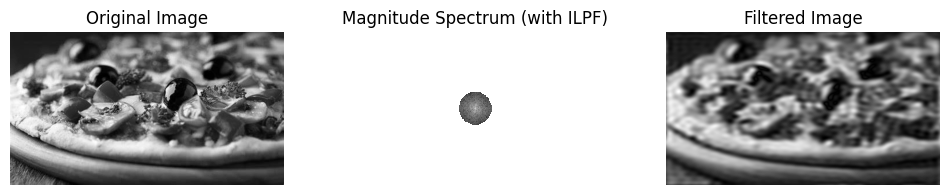

In [ ]:
#ILPF
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def ideal_lowpass_filter(Shape, cutoff):
  rows,cols=Shape
  center_row,center_col=rows//2,cols//2
  mask=np.zeros((rows,cols),dtype=np.float32)
  for i in range(rows):
    for j in range(cols):
      distance=np.sqrt((i-center_row)**2+(j-center_col)**2)
      if distance<=cutoff:
        mask[i,j]=1
  return mask

#Load the image and convert to grayscale
image_path = '/content/OIP (4).jpg'  # Replace with your image path
image = Image.open(image_path).convert('L')
image_np = np.array(image)

# Compute the 2D Fourier Transform of the image
f_transform = np.fft.fft2(image_np)
f_transform_shifted = np.fft.fftshift(f_transform)

#create the ILPF mask
cutoff=30  #Adjust the cutoff frequency as needed
mask=ideal_lowpass_filter(image_np.shape,cutoff)

#Apply the ILPF to the Fourier-Transformed image
filtered_transform=f_transform_shifted*mask

# Compute the Inverse Fourier Transform to get the filtered image
filtered_transform_shifted=np.fft.ifftshift(filtered_transform)
filtered_image=np.fft.ifft2(filtered_transform_shifted)
filtered_image=np.abs(filtered_image)

#plot the original image and the filtered image
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.imshow(image_np,cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(20*np.log(np.abs(filtered_transform)),cmap='gray')
plt.title('Magnitude Spectrum (with ILPF)')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(filtered_image,cmap='gray')
plt.title('Filtered Image')
plt.axis('off')

plt.show()

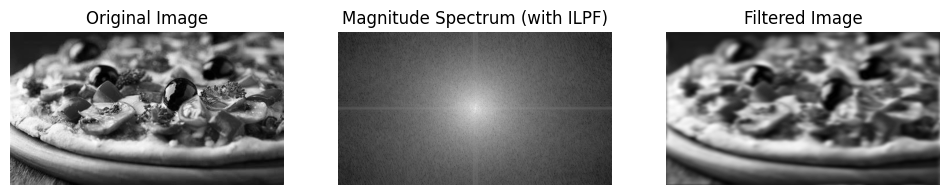

In [ ]:
#BLPF
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def butterworth_lowpass_filter(Shape, cutoff,order):
  rows,cols=Shape
  center_row,center_col=rows//2,cols//2
  mask=np.zeros((rows,cols),dtype=np.float32)
  for i in range(rows):
    for j in range(cols):
      distance=np.sqrt((i-center_row)**2+(j-center_col)**2)
      mask[i,j]=1/(1+(distance/cutoff)**(2*order))
  return mask

#Load the image and convert to grayscale
image_path = '/content/OIP (4).jpg'  # Replace with your image path
image = Image.open(image_path).convert('L')
image_np = np.array(image)

# Compute the 2D Fourier Transform of the image
f_transform = np.fft.fft2(image_np)
f_transform_shifted = np.fft.fftshift(f_transform)

#create the ILPF mask
cutoff=30  #Adjust the cutoff frequency as needed
order=2  #Adjust the order of the Butterworth filter as needed
mask=butterworth_lowpass_filter(image_np.shape, cutoff,order)

#Apply the ILPF to the Fourier-Transformed image
filtered_transform=f_transform_shifted*mask

# Compute the Inverse Fourier Transform to get the filtered image
filtered_transform_shifted=np.fft.ifftshift(filtered_transform)
filtered_image=np.fft.ifft2(filtered_transform_shifted)
filtered_image=np.abs(filtered_image)

#plot the original image and the filtered image
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.imshow(image_np,cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(20*np.log(np.abs(filtered_transform)),cmap='gray')
plt.title('Magnitude Spectrum (with ILPF)')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(filtered_image,cmap='gray')
plt.title('Filtered Image')
plt.axis('off')

plt.show()